In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
positive = pd.read_csv('../assets/positive.csv', sep=';', usecols=[3], names = ['text'])
positive['label'] = ['positive'] * len(positive)

negative = pd.read_csv('../assets/negative.csv', sep=';', usecols=[3], names = ['text'])
negative['label'] = ['negative'] * len(negative)

df = pd.concat([positive, negative])

In [4]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from nltk import ngrams

In [8]:
sentence = 'Если бы мне платили каждый раз'.split()
list(ngrams(sentence, 3))

[('Если', 'бы', 'мне'),
 ('бы', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [9]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(x_train)

In [10]:
list(vectorizer.vocabulary_.items())[:10]

[('кадырчик', 142525),
 ('rkadyrov', 73906),
 ('делай', 124495),
 ('их', 142011),
 ('акцент', 99485),
 ('на', 161879),
 ('глаза', 120116),
 ('из', 139435),
 ('бесконечности', 105387),
 ('тряся', 224193)]

In [11]:
clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(bag_of_words, y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [12]:
predictions = clf.predict(vectorizer.transform(x_test))
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76     28273
    positive       0.76      0.78      0.77     28436

    accuracy                           0.77     56709
   macro avg       0.77      0.77      0.77     56709
weighted avg       0.77      0.77      0.77     56709



In [13]:
vectorizer = CountVectorizer(ngram_range = (3, 3))
bag_of_words = vectorizer.fit_transform(x_train)

clf = LogisticRegression(random_state=42)
clf.fit(bag_of_words, y_train)

predictions = clf.predict(vectorizer.transform(x_test))
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

    negative       0.85      0.57      0.68     41468
    positive       0.38      0.73      0.50     15241

    accuracy                           0.61     56709
   macro avg       0.62      0.65      0.59     56709
weighted avg       0.72      0.61      0.63     56709



In [14]:
# теперь TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(x_train)

clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(bag_of_words, y_train)

predictions = clf.predict(vectorizer.transform(x_test))
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

    negative       0.74      0.76      0.75     26790
    positive       0.78      0.76      0.77     29919

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



In [17]:
from nltk.tokenize import word_tokenize

In [18]:
example = 'Но не каждый хочет что-то исправлять:('
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

In [19]:
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer']

In [20]:
whitespace_tokenize = tokenize.WhitespaceTokenizer()
list(whitespace_tokenize.tokenize(example))

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять:(']

In [21]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

In [22]:
tokenize.SExprTokenizer().tokenize("vector<int> ar(n); ar[i][8] = 3")

['vector<int>', 'ar', '(n)', '; ar[i][8] = 3']

In [23]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [24]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
noise = stopwords.words('russian') + list(punctuation)

In [26]:
vectorizer = CountVectorizer(
    ngram_range=(1, 1), 
    tokenizer=word_tokenize, 
    stop_words=noise
)
bag_of_words = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42, max_iter=200)

clf.fit(bag_of_words, y_train)
predictions = clf.predict(vectorizer.transform(x_test))
print(classification_report(predictions, y_test))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.81      0.76      0.78     29415
    positive       0.76      0.80      0.78     27294

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



In [27]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [28]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


In [29]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'но', 'wt': 0.9998906299, 'gr': 'CONJ='}],
  'text': 'Но'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'каждый',
    'wt': 0.9985975799,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'lex': 'хотеть',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'хочет'},
 {'text': ' '},
 {'analysis': [{'lex': 'что-то', 'wt': 1, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'lex': 'исправлять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'исправлять'},
 {'text': ':(\n'}]

In [30]:
import re
from IPython.display import clear_output

processed_text_cnt = 0

def my_preprocess(text):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    clear_output(True)
    global processed_text_cnt
    processed_text_cnt += 1
    print("Completing ", processed_text_cnt, "out of", len(x_train))
    return [word for word in text if word not in stopwords.words('russian') + [' ', '\n']]

In [31]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'
mystem_analyzer = Mystem()

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


In [32]:
from collections import Counter

In [33]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
print(corpus[:10])

2870536
['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']


In [34]:
frequency_dict = Counter(corpus)
frequency_dict_sorted = sorted(frequency_dict.items(), key=lambda x: -x[1])
list(frequency_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

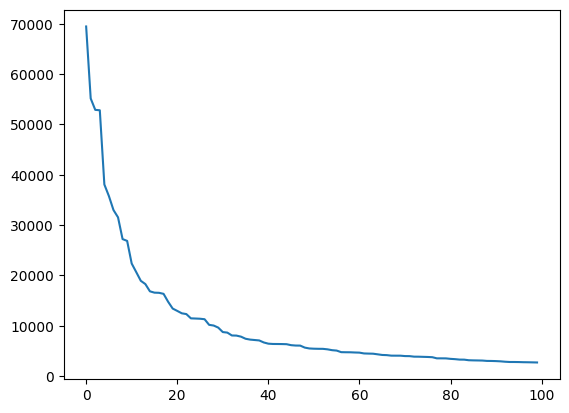

In [35]:
import matplotlib.pyplot as plt 
%matplotlib inline
first_100_freqs = [freq for word, freq in frequency_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

In [115]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bag_of_words = vectorizer.fit_transform(x_train)

clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(bag_of_words, y_train)
predictions = clf.predict(vectorizer.transform(x_test))

print(classification_report(predictions, y_test))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27655
    positive       1.00      1.00      1.00     29054

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [133]:
coefficents = clf.coef_[0]
mvp_indices = np.argsort(coefficents)
feature_names = vectorizer.get_feature_names_out()

top_indices = mvp_indices[-10:]
top_features = feature_names[top_indices]
top_coefficients = coefficents[top_indices]

print("Top features with the highest weights:")
for feature, coef in zip(top_features, top_coefficients):
    print(f"{feature}: {coef}")

Top features with the highest weights:
ddddd: 2.969471065506647
dddd: 4.994661401323672
:: 6.419250004263196
-d: 7.6182557865971
*: 7.905597296499824
ddd: 8.142228797748084
^_^: 9.396124184528594
dd: 10.92152580142445
d: 26.663428697629357
): 58.67649957102542


In [156]:
cool_token = '*o*'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       1.00      0.49      0.66     56709
    positive       0.00      0.00      0.00         0

    accuracy                           0.49     56709
   macro avg       0.50      0.24      0.33     56709
weighted avg       1.00      0.49      0.66     56709



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [157]:
for data, label in zip(x_train, y_train):
    if cool_token in data and label == 'positive':
        print(data)

@crazy__clever awww спасибо *o*
ты тоже очень милая :**
Юххххуууууу:D Наконец-тоооо*o* релиз от Nicky!!! 
http://t.co/74g17SzIDT 
Nicky Romero *o*


## Символьные n-граммы

Теперь в качестве фичей используем, например, униграммы символов:

In [159]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bag_of_words = vectorizer.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bag_of_words, y_train)
predictions = clf.predict(vectorizer.transform(x_test))
print(classification_report(predictions, y_test))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     27571
    positive       1.00      0.99      0.99     29138

    accuracy                           0.99     56709
   macro avg       0.99      0.99      0.99     56709
weighted avg       0.99      0.99      0.99     56709



In [160]:
import re

In [165]:
result = re.findall('ab+c.', 'abbcabcdefghijkabcabcxabc')
print(result)

['abbca', 'abca']


In [171]:
check_text = 'The sun was setting over the horizon, casting a warm golden glow across the landscape. Birds were singing their evening songs, adding a melodic backdrop to the tranquil scene. Children played in the park, their laughter echoing in the soft twilight. As the day slowly faded into night, the first stars began to twinkle in the sky.'
result = re.split('\.', check_text, maxsplit=3)
print(result)

['The sun was setting over the horizon, casting a warm golden glow across the landscape', ' Birds were singing their evening songs, adding a melodic backdrop to the tranquil scene', ' Children played in the park, their laughter echoing in the soft twilight', ' As the day slowly faded into night, the first stars began to twinkle in the sky.']


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_14660\1618514481.py:2: SyntaxWarning: invalid escape sequence '\.'
  result = re.split('\.', check_text, maxsplit=3)
